<a href="https://colab.research.google.com/github/andres-merino/MatematicasDiscretas-Virtual-05-N0279/blob/main/pages/clases/clase16/AlgoritmosGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Catálogo STEM</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Algoritmos sobre grafos
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Septiembre 2025
            </font></p>
        </td>  
    </tr>
</table>

En esta sesión exploraremos conceptos avanzados de teoría de grafos, incluyendo grafos Eulerianos, el algoritmo de Dijkstra, y algoritmos de búsqueda en profundidad (DFS) y amplitud (BFS) para árboles de expansión.

In [52]:
# Importamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, defaultdict
import heapq
from typing import List, Tuple, Dict, Set

---
## <font color='264CC7'> Grafos Eulerianos</font>
---

Un **grafo Euleriano** es aquel que contiene un **circuito Euleriano**, es decir, un camino cerrado que recorre cada arista exactamente una vez. Un **camino Euleriano** es un camino que recorre cada arista exactamente una vez, pero no necesariamente es cerrado.

Podemos comprobar si un grafo es Euleriano utilizando el método de NetworkX `is_eulerian()`.

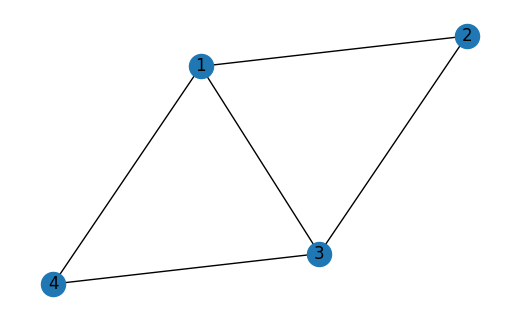

Grafo G1 es euleriano: False


In [53]:
# Ejemplo 1
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])

# Mostrar el grafo
plt.figure(figsize=(5, 3))
nx.draw(G1, with_labels=True)
plt.show()

# Comprobamos si es euleriano
print("Grafo G1 es euleriano:", nx.is_eulerian(G1))

El grafo anterior no es Euleriano, pero sí tiene un camino Euleriano. Podemos encontrarlo utilizando el método `has_eulerian_path()`.

In [54]:
# Comprobamos si es euleriano
print("Grafo G1 tiene un camino euleriano:", nx.has_eulerian_path(G1))

Grafo G1 tiene un camino euleriano: True


Obtenemos el camino Euleriano utilizando el método `eulerian_circuit()`.

In [55]:
# Camino Euleriano
eulerian_path = list(nx.eulerian_path(G1))
print("Camino Euleriano en G1:", eulerian_path)

Camino Euleriano en G1: [(1, 2), (2, 3), (3, 1), (1, 4), (4, 3)]


---
## <font color='264CC7'> Camino más corto: Algoritmo de Dijkstra</font>
---

Podemos obtener el camino más corto entre dos nodos en un grafo ponderado utilizando el algoritmo de Dijkstra, implementado en NetworkX con el método `shortest_path()`. Además podermos enlistar todos los caminos simples entre dos nodos con `all_simple_paths()`.

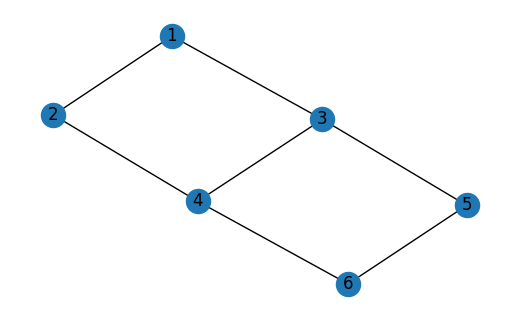

Camino más corto de 1 a 6: [1, 2, 4, 6]
Longitud: 3

Todos los caminos simples de 1 a 6:
  1. [1, 2, 4, 3, 5, 6] (longitud: 5)
  2. [1, 2, 4, 6] (longitud: 3)
  3. [1, 3, 4, 6] (longitud: 3)
  4. [1, 3, 5, 6] (longitud: 3)


In [56]:
# Crear un grafo de ejemplo
G_caminos = nx.Graph()
G_caminos.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6)])

# Visualizar el grafo
plt.figure(figsize=(5, 3))
nx.draw(G_caminos, with_labels=True)
plt.show()

# Encontrar caminos
inicio, destino = 1, 6
camino_corto = nx.shortest_path(G_caminos, inicio, destino)
todos_caminos = list(nx.all_simple_paths(G_caminos, inicio, destino))

print(f"Camino más corto de {inicio} a {destino}: {camino_corto}")
print(f"Longitud: {len(camino_corto) - 1}")
print(f"\nTodos los caminos simples de {inicio} a {destino}:")
for i, camino in enumerate(todos_caminos, 1):
    print(f"  {i}. {camino} (longitud: {len(camino) - 1})")

También, podemos calcular la matriz de distancias entre todos los pares de nodos utilizando `all_pairs_dijkstra_path_length()`.

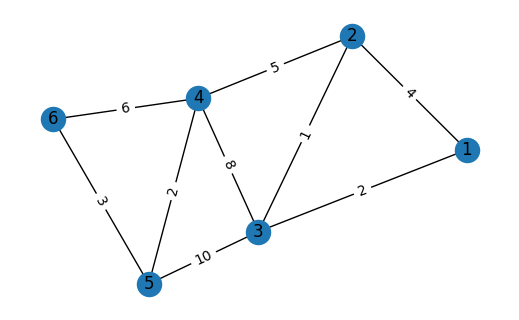

Matriz de distancias entre todos los pares de nodos:
Desde 1: {1: 0, 3: 2, 2: 3, 4: 8, 5: 10, 6: 13}
Desde 2: {2: 0, 3: 1, 1: 3, 4: 5, 5: 7, 6: 10}
Desde 3: {3: 0, 2: 1, 1: 2, 4: 6, 5: 8, 6: 11}
Desde 4: {4: 0, 5: 2, 2: 5, 6: 5, 3: 6, 1: 8}
Desde 5: {5: 0, 4: 2, 6: 3, 2: 7, 3: 8, 1: 10}
Desde 6: {6: 0, 5: 3, 4: 5, 2: 10, 3: 11, 1: 13}

Matriz de distancias (numpy):
[[ 0.  3.  2.  8. 10. 13.]
 [ 3.  0.  1.  5.  7. 10.]
 [ 2.  1.  0.  6.  8. 11.]
 [ 8.  5.  6.  0.  2.  5.]
 [10.  7.  8.  2.  0.  3.]
 [13. 10. 11.  5.  3.  0.]]


In [57]:
# Crear un grafo con pesos
G_dijkstra = nx.Graph()
aristas_con_pesos = [
    (1, 2, 4), (1, 3, 2), (2, 3, 1), (2, 4, 5),
    (3, 4, 8), (3, 5, 10), (4, 5, 2), (4, 6, 6), (5, 6, 3)
]

for u, v, peso in aristas_con_pesos:
    G_dijkstra.add_edge(u, v, weight=peso)

# Visualizar el grafo con pesos
fig = plt.figure(figsize=(5, 3))

# Grafo original
pos = nx.spring_layout(G_dijkstra, seed=42)
nx.draw(G_dijkstra, pos, with_labels=True)

# Agregar etiquetas de peso
edge_labels = nx.get_edge_attributes(G_dijkstra, 'weight')
nx.draw_networkx_edge_labels(G_dijkstra, pos, edge_labels=edge_labels)
plt.show()

# Matriz de distancias
distancias = dict(nx.all_pairs_dijkstra_path_length(G_dijkstra))
print("Matriz de distancias entre todos los pares de nodos:")
for origen, destinos in distancias.items():
    print(f"Desde {origen}: {destinos}")

# Guardo como matriz numpy
nodos = list(G_dijkstra.nodes())
matriz_distancias = np.zeros((len(nodos), len(nodos)))
for i, origen in enumerate(nodos):
    for j, destino in enumerate(nodos):
        matriz_distancias[i, j] = distancias[origen].get(destino, np.inf)
print("\nMatriz de distancias (numpy):")
print(matriz_distancias)


---
## <font color='264CC7'> BFS para Árboles de Expansión</font>
---

El algoritmo **BFS (Búsqueda en Amplitud)** puede utilizarse para construir árboles de expansión. Un árbol de expansión BFS desde un vértice fuente contiene todos los caminos más cortos (en número de aristas) desde la fuente a todos los demás vértices alcanzables.

In [58]:
def arbol_expansion_bfs(G, v):
    """
    Construye un árbol de expansión usando BFS
    Implementación específica solicitada
    """
    Q = [v]
    M = {v}
    T = set()
    while Q != []:
        u = Q.pop()
        for w in G[u]:
            if w not in M:
                M.add(w)
                T.add((u, w))
                Q.insert(0, w)
    return M, T


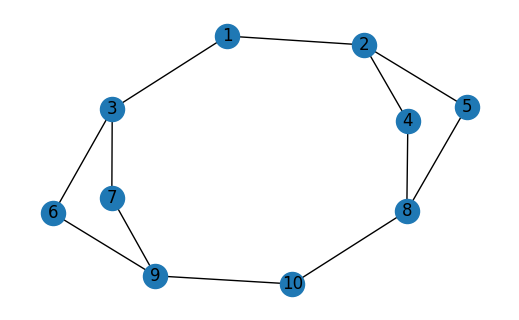

In [59]:
# Crear un grafo para demostrar BFS
G_bfs = nx.Graph()
G_bfs.add_edges_from([
    (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7),
    (4, 8), (5, 8), (6, 9), (7, 9), (8, 10), (9, 10)
])

# Muestra el grafo
plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G_bfs, seed=42)
nx.draw(G_bfs, pos, with_labels=True)
plt.show()


Aristas del árbol BFS: {(2, 4), (1, 2), (6, 9), (3, 7), (8, 10), (4, 8), (3, 6), (2, 5), (1, 3)}


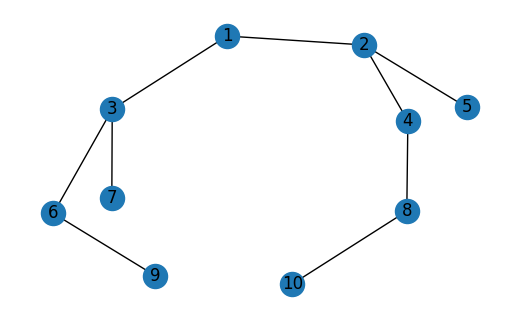

In [60]:
# Ejecutar BFS desde vértice 1
inicio_bfs = 1
M_bfs, T_bfs = arbol_expansion_bfs(G_bfs, inicio_bfs)
print(f"Aristas del árbol BFS: {T_bfs}")

# Crear un grafo con pesos
G_bfs = nx.Graph()
G_bfs.add_edges_from(T_bfs)

# Mostrar el grafo resultante
plt.figure(figsize=(5, 3))
nx.draw(G_bfs, pos, with_labels=True)
plt.show()

## <font color='264CC7'> 6. DFS para Árboles de Expansión</font>

El algoritmo **DFS (Búsqueda en Profundidad)** también puede construir árboles de expansión. A diferencia de BFS, DFS explora tan profundo como sea posible antes de retroceder, lo que puede resultar en árboles con diferentes estructuras.

In [61]:
def arbol_expansion_dfs(G, v):
    """
    Construye un árbol de expansión usando DFS
    Implementación específica solicitada
    """
    Q = [v]
    M = {v}
    T = set()
    while Q != []:
        u = Q[-1]
        if all(w in M for w in G[u]):
            Q.pop()
        else:
            for w in G[u]:
                if w not in M:
                    M.add(w)
                    T.add((u, w))
                    Q.append(w)
                    break
    return M, T


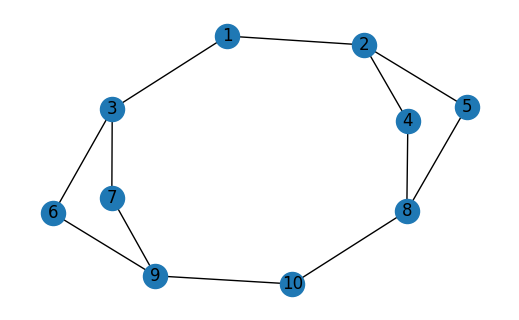

In [62]:
# Crear un grafo para demostrar BFS
G_bfs = nx.Graph()
G_bfs.add_edges_from([
    (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7),
    (4, 8), (5, 8), (6, 9), (7, 9), (8, 10), (9, 10)
])

# Muestra el grafo
plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G_bfs, seed=42)
nx.draw(G_bfs, pos, with_labels=True)
plt.show()

Aristas del árbol DFS: {(2, 4), (1, 2), (3, 7), (9, 6), (8, 10), (4, 8), (10, 9), (6, 3), (8, 5)}


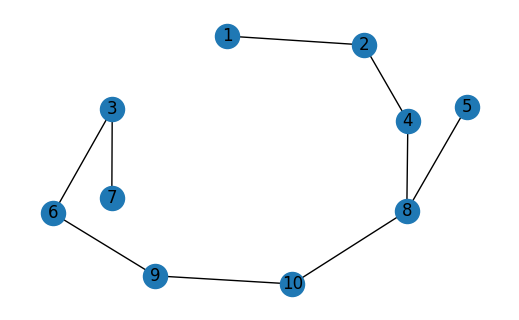

In [63]:
# Ejecutar DFS desde vértice 1
inicio_dfs = 1
M_dfs, T_dfs = arbol_expansion_dfs(G_bfs, inicio_dfs)
print(f"Aristas del árbol DFS: {T_dfs}")

# Crear un grafo con pesos
G_dfs = nx.Graph()
G_dfs.add_edges_from(T_dfs)

# Mostrar el grafo resultante
plt.figure(figsize=(5, 3))
nx.draw(G_dfs, pos, with_labels=True)
plt.show()